In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris()

In [3]:
X = iris.data[:, (2,3)] # petal lenght and width
y = (iris.target == 0).astype(np.int) ## iris - setosa?


In [4]:
per_clf = Perceptron()
per_clf.fit(X,y)

Perceptron()

In [5]:
y_pred = per_clf.predict([[2,0.5]])

In [6]:
y_pred

array([0])

In [12]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
import tensorflow as tf
from tensorflow import keras

In [15]:
tf.__version__

'2.6.0'

In [16]:
keras.__version__

'2.6.0'

In [17]:
# load fashion mnist for classification task
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


4431872/4422102 [==============================] - 8s 2us/step


In [18]:
X_train_full.shape

(60000, 28, 28)

In [19]:
X_train_full.dtype

dtype('uint8')

In [70]:
# transformar los pixeles en 0-1 dividiendo 255
X_train, X_valid = X_train_full[:55000]/255 , X_train_full[55000:]/255
y_train, y_valid = y_train_full[:55000]/255, y_train_full[55000:]/255


In [71]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train_full[0]]

'Ankle boot'

In [152]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
#one ouput per class


In [153]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_36 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_37 (Dense)             (None, 10)                210       
Total params: 40,480
Trainable params: 40,480
Non-trainable params: 0
_________________________________________________________________


In [154]:
hiden1 = model.layers[1]
weights, biases = hiden1.get_weights()

In [155]:
weights

array([[-0.06683774,  0.06422486, -0.07075875, ...,  0.04255634,
         0.07191921, -0.07193829],
       [-0.02167144, -0.05001889, -0.05897226, ..., -0.03858723,
        -0.02936824, -0.01503258],
       [ 0.04027718, -0.06275478, -0.0829412 , ..., -0.05668899,
        -0.04212368,  0.03528522],
       ...,
       [-0.07463255, -0.0468191 ,  0.0830576 , ...,  0.06655382,
         0.06599282, -0.04548356],
       [ 0.05423207,  0.07384256, -0.06114604, ..., -0.01879763,
         0.03578532, -0.03580252],
       [-0.00957494,  0.06218604,  0.00038865, ...,  0.01156357,
         0.00047838,  0.05367043]], dtype=float32)

In [156]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [157]:
# biases are initialize to 0 and weights are randomly asigned
# compile the model
from keras.metrics import Accuracy

model.compile(loss="sparse_categorical_crossentropy", 
             optimizer="sgd",
             metrics= ["accuracy"])

In [158]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))


Epoch 1/30


ValueError: in user code:

    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Jeronimo\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\training.py:787 train_step
        y_pred = self(x, training=True)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\sequential.py:369 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\functional.py:414 call
        return self._run_internal_graph(
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_35 is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape (None, 8)


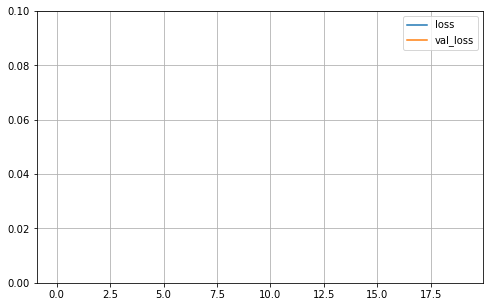

In [159]:
# see in a plot how the curves converge
import pandas as pd
import matplotlib.pyplot  as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,0.1)
plt.show()
        

In [148]:
model.evaluate(X_test, y_test)

ValueError: in user code:

    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\training.py:1330 test_function  *
        return step_function(self, iterator)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\training.py:1320 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Jeronimo\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\training.py:1313 run_step  **
        outputs = model.test_step(data)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\training.py:1267 test_step
        y_pred = self(x, training=False)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\sequential.py:369 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\functional.py:414 call
        return self._run_internal_graph(
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_32 is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape (None, 8)


In [149]:
X_new = X_test[:3]
y_proba = model.predict(X_new)

ValueError: in user code:

    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\training.py:1586 predict_function  *
        return step_function(self, iterator)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Jeronimo\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\training.py:1569 run_step  **
        outputs = model.predict_step(data)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\training.py:1537 predict_step
        return self(x, training=False)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\sequential.py:369 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\functional.py:414 call
        return self._run_internal_graph(
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_32 is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape (None, 8)


In [150]:
y_proba.round(2)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [151]:
y_pred = np.argmax(model.predict(X_new), axis=-1)

ValueError: in user code:

    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\training.py:1586 predict_function  *
        return step_function(self, iterator)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Jeronimo\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\training.py:1569 run_step  **
        outputs = model.predict_step(data)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\training.py:1537 predict_step
        return self(x, training=False)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\sequential.py:369 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\functional.py:414 call
        return self._run_internal_graph(
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\Jeronimo\anaconda3\lib\site-packages\keras\engine\input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_32 is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape (None, 8)


In [127]:
np.array(class_names)[y_pred]

array(['T-shirt/top', 'T-shirt/top', 'T-shirt/top'], dtype='<U11')

In [130]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [131]:
## bulding Regression MLP using sequential API
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
housing = fetch_california_housing() 
X_train_full, X_test, y_train_full, y_test = train_test_split( housing.data, housing.target) 
X_train, X_valid, y_train, y_valid = train_test_split( X_train_full, y_train_full) 
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_valid = scaler.transform(X_valid) 
X_test = scaler.transform(X_test)



In [132]:
model = keras.models.Sequential([ keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]), 
                                 keras.layers.Dense(1) ]) 

model.compile(loss="mean_squared_error", optimizer="sgd") 
history = model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_valid, y_valid)) 
 # pretend these are new instances y_pred = model.predict(X_new)



Epoch 1/20
363/363 [==============================] - 0s 831us/step - loss: 0.8239 - val_loss: 1.3386
Epoch 2/20
363/363 [==============================] - 0s 604us/step - loss: 0.6722 - val_loss: 4.5031
Epoch 3/20
363/363 [==============================] - 0s 643us/step - loss: 0.5569 - val_loss: 0.4774
Epoch 4/20
363/363 [==============================] - 0s 601us/step - loss: 0.4506 - val_loss: 0.4554
Epoch 5/20
363/363 [==============================] - 0s 569us/step - loss: 0.4293 - val_loss: 0.4419
Epoch 6/20
363/363 [==============================] - 0s 764us/step - loss: 0.4204 - val_loss: 0.4346
Epoch 7/20
363/363 [==============================] - 0s 737us/step - loss: 0.4113 - val_loss: 0.4285
Epoch 8/20
363/363 [==============================] - 0s 645us/step - loss: 0.4032 - val_loss: 0.4188
Epoch 9/20
363/363 [==============================] - 0s 600us/step - loss: 0.3979 - val_loss: 0.4126
Epoch 10/20
363/363 [==============================] - 0s 643us/step - loss: 0.392

In [136]:
mse_test = model.evaluate(X_test, y_test) 
X_new = X_test[:3]
y_pred = model.predict(X_new)


162/162 [==============================] - 0s 510us/step - loss: 0.3421


In [137]:
y_pred

array([[2.3985882],
       [2.5873528],
       [1.7465595]], dtype=float32)

In [138]:
y_test[:3]

array([2.44 , 2.139, 1.956])

In [139]:
#wide and Deep

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_) 
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1) 
concat = keras.layers.Concatenate()([input_, hidden2]) 
output = keras.layers.Dense(1)(concat) 
model = keras.Model(inputs=[input_], outputs=[output])